In [1]:
import pandas as pd
import pprint
from datetime import datetime
import matplotlib.pyplot as plt

lobbyist_data_main = pd.read_csv(r"C:\Users\lealr\OneDrive\DU Bootcamp\Project1\lobbyist_bundle_FECgov.csv")

lobbyist_data_main

,Committee_Id,Committee_Name,Link_Image,Committee_Election_State,Committee_Election_District,Report_Type,Receipt_Date,Coverage_Start_Date,Coverage_End_Date,Quarterly_Contribution,Semi_Annual_Contribution
0,C00000935,DCCC,http://docquery.fec.gov/cgi-bin/fecimg/?_20230...,NaN,NaN,MARCH MONTHLY,17-Mar-23,1-Feb-23,28-Feb-23,42000.00,0.00
1,C00369801,DAVID SCOTT FOR CONGRESS,http://docquery.fec.gov/cgi-bin/fecimg/?_20230...,GA,13.0,QUARTERLY YEAR END / SEMI-ANN,8-Mar-23,1-Jul-22,31-Dec-22,41000.00,41000.00
2,C00765800,FETTERMAN FOR PA,http://docquery.fec.gov/cgi-bin/fecimg/?_20230...,PA,NaN,POST-GENERAL,27-Feb-23,20-Oct-22,28-Nov-22,26070.13,0.00
3,C00765800,FETTERMAN FOR PA,http://docquery.fec.gov/cgi-bin/fecimg/?_20230...,PA,NaN,QUARTERLY SEMI-ANNUAL (YE),27-Feb-23,29-Nov-22,31-Dec-22,0.00,196876.49
4,C00255562,FRIENDS OF JIM CLYBURN,http://docquery.fec.gov/cgi-bin/fecimg/?_20230...,NaN,NaN,QUARTERLY YEAR END / SEMI-ANN,25-Feb-23,1-Jul-22,31-Dec-22,28000.00,28000.00
...,...,...,...,...,...,...,...,...,...,...,...
1317,C00000935,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,http://docquery.fec.gov/cgi-bin/fecimg/?_29934...,NaN,NaN,JUNE MONTHLY,19-Jun-09,1-May-09,31-May-09,30000.00,0.00
1318,C00042366,DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,http://docquery.fec.gov/cgi-bin/fecimg/?_29020...,NaN,NaN,JUNE MONTHLY,19-Jun-09,1-May-09,31-May-09,68500.00,0.00
1319,C00417519,PROGRESSIVE VICTORY FUND POLITICAL ACTION COMM...,http://docquery.fec.gov/cgi-bin/fecimg/?_29030...,NaN,NaN,MAY MONTHLY,20-May-09,1-Apr-09,30-Apr-09,0.00,NaN
1320,C00042366,DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,http://docquery.fec.gov/cgi-bin/fecimg/?_29020...,NaN,NaN,MAY MONTHLY,20-May-09,1-Apr-09,30-Apr-09,209700.00,0.00


In [2]:
# Convert 'Coverage_Start_Date' and 'Coverage_End_Date' columns to datetime objects
lobbyist_data_main['Coverage_Start_Date'] = pd.to_datetime(lobbyist_data_main['Coverage_Start_Date'])
lobbyist_data_main['Coverage_End_Date'] = pd.to_datetime(lobbyist_data_main['Coverage_End_Date'])

# Find the minimum and maximum dates in 'Coverage_Start_Date' and 'Coverage_End_Date' columns
start_date = lobbyist_data_main['Coverage_Start_Date'].min().strftime('%d-%m-%Y')
end_date = lobbyist_data_main['Coverage_End_Date'].max().strftime('%d-%m-%Y')

print(start_date)
print(end_date)

01-01-2009
28-02-2023


In [3]:
# Filtering out the 'NaN' variables
lobbyist_data_main.dropna(inplace=True)

# Reset index
lobbyist_data_main.reset_index(inplace=True)


# Creating DataFrames to separate 'Semi Annual Contributions' and 'Quarterly Contributions'

quarterly_contributions_df = lobbyist_data_main[[
    'Committee_Name', 
    'Committee_Id', 
    'Committee_Election_State', 
    'Report_Type', 
    'Receipt_Date', 
    'Quarterly_Contribution'
]]

# semi-annual contributions
semi_annual_contributions_df = lobbyist_data_main[[
    'Committee_Name', 
    'Committee_Id', 
    'Committee_Election_State', 
    'Report_Type', 
    'Receipt_Date', 
    'Semi_Annual_Contribution'
]]

In [4]:
quarterly_contributions_df

,Committee_Name,Committee_Id,Committee_Election_State,Report_Type,Receipt_Date,Quarterly_Contribution
0,DAVID SCOTT FOR CONGRESS,C00369801,GA,QUARTERLY YEAR END / SEMI-ANN,8-Mar-23,41000.00
1,TOM MALINOWSKI FOR CONGRESS,C00656686,NJ,QUARTERLY YEAR END / SEMI-ANN,21-Feb-23,29146.40
2,CHRIS PAPPAS FOR CONGRESS,C00660464,NH,OCTOBER QUARTERLY,1-Feb-23,45596.87
3,CHRIS PAPPAS FOR CONGRESS,C00660464,NH,JULY QUARTERLY / SEMI-ANNUAL,1-Feb-23,31500.00
4,JOSH HARDER FOR CONGRESS,C00639146,CA,QUARTERLY SEMI-ANNUAL (YE),31-Jan-23,0.00
...,...,...,...,...,...,...
471,VAN HOLLEN FOR CONGRESS,C00366096,MD,JULY QUARTERLY / SEMI-ANNUAL,15-Jul-09,20425.00
472,CHET EDWARDS FOR CONGRESS,C00240465,TX,JULY QUARTERLY / SEMI-ANNUAL,15-Jul-09,52400.00
473,DAVE WU FOR US CONGRESS,C00329292,OR,JULY QUARTERLY / SEMI-ANNUAL,15-Jul-09,8500.00
474,FORWARD TOGETHER PAC,C00412791,VA,QUARTERLY MID-YEAR / SEMI-ANN,13-Jul-09,18000.00


In [5]:
semi_annual_contributions_df

,Committee_Name,Committee_Id,Committee_Election_State,Report_Type,Receipt_Date,Semi_Annual_Contribution
0,DAVID SCOTT FOR CONGRESS,C00369801,GA,QUARTERLY YEAR END / SEMI-ANN,8-Mar-23,41000.0
1,TOM MALINOWSKI FOR CONGRESS,C00656686,NJ,QUARTERLY YEAR END / SEMI-ANN,21-Feb-23,29146.4
2,CHRIS PAPPAS FOR CONGRESS,C00660464,NH,OCTOBER QUARTERLY,1-Feb-23,0.0
3,CHRIS PAPPAS FOR CONGRESS,C00660464,NH,JULY QUARTERLY / SEMI-ANNUAL,1-Feb-23,31500.0
4,JOSH HARDER FOR CONGRESS,C00639146,CA,QUARTERLY SEMI-ANNUAL (YE),31-Jan-23,36107.6
...,...,...,...,...,...,...
471,VAN HOLLEN FOR CONGRESS,C00366096,MD,JULY QUARTERLY / SEMI-ANNUAL,15-Jul-09,20425.0
472,CHET EDWARDS FOR CONGRESS,C00240465,TX,JULY QUARTERLY / SEMI-ANNUAL,15-Jul-09,52400.0
473,DAVE WU FOR US CONGRESS,C00329292,OR,JULY QUARTERLY / SEMI-ANNUAL,15-Jul-09,18500.0
474,FORWARD TOGETHER PAC,C00412791,VA,QUARTERLY MID-YEAR / SEMI-ANN,13-Jul-09,18000.0


In [6]:
# Create a new dataframe with desired columns
election_state_df = lobbyist_data_main[['Committee_Election_State', 'Semi_Annual_Contribution', 'Quarterly_Contribution']]

# Calculate the sum of 'Semi_Annual_Contribution' and 'Quarterly_Contribution' columns together using .loc indexing
election_state_df.loc[:, 'Total_Contribution'] = election_state_df['Semi_Annual_Contribution'] + election_state_df['Quarterly_Contribution']

# Group by 'Committee_Election_State' and calculate the sum of 'Total_Contribution'
state_total_contribution_df = election_state_df.groupby('Committee_Election_State').sum(numeric_only=True).reset_index()

# Keep only 'Committee_Election_State' and 'Total_Contribution' columns
state_total_contribution_df = state_total_contribution_df[['Committee_Election_State', 'Total_Contribution']]

# Renaming the columns
state_total_contribution_df = state_total_contribution_df.rename(columns={
    'Committee_Election_State': 'Election State', 
    'Total_Contribution': 'Total Contribution'
})

state_total_contribution_df

C:\Users\lealr\AppData\Local\Temp\ipykernel_12780\21135542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_state_df.loc[:, 'Total_Contribution'] = election_state_df['Semi_Annual_Contribution'] + election_state_df['Quarterly_Contribution']


,Election State,Total Contribution
0,AL,84450.00
1,AZ,1259414.00
2,CA,1885454.20
3,CO,2072641.28
4,DC,23800.00
5,DE,101200.00
6,GA,418812.53
7,HI,538462.00
8,IL,967320.50
9,KS,49078.68


C:\Users\lealr\AppData\Local\Temp\ipykernel_12780\1086674849.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in plt.gca().get_yticks()])


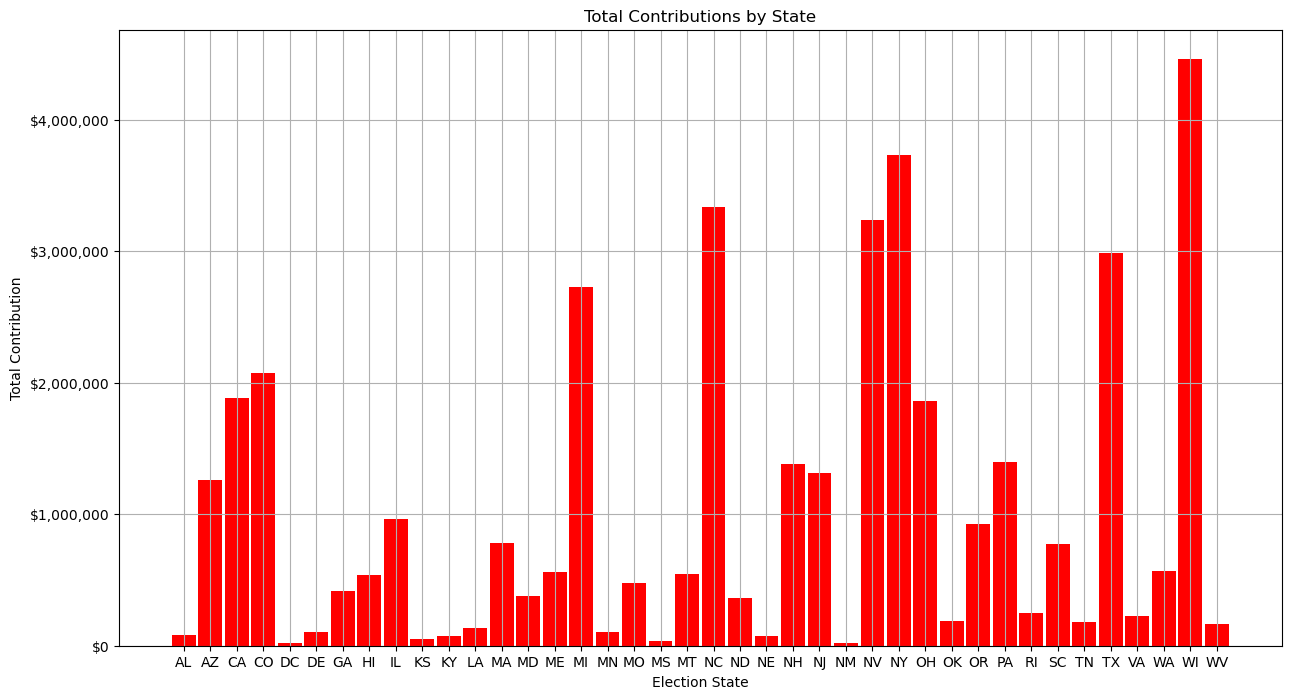

In [7]:
plt.figure(figsize=(15,8))


# Retrieving the contribution value to use for the bar plot
total_contributions = state_total_contribution_df['Total Contribution']

# Create a bar plot
plt.bar(state_total_contribution_df['Election State'], state_total_contribution_df['Total Contribution'], width=0.9, color="red")

# Add labels and title
plt.xlabel('Election State')
plt.ylabel('Total Contribution')
plt.title('Total Contributions by State')

# Setting the xlabels rotation
plt.xticks(rotation=0)

# Fixing the yaxis to show total contributions
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in plt.gca().get_yticks()])

plt.grid()

# Show the plot
plt.show()

In [8]:
# Create a new dataframe for Colorado ('CO')
colorado_contributions_df = lobbyist_data_main[lobbyist_data_main['Committee_Election_State'] == 'CO'][[
    'Committee_Name', 'Committee_Id', 'Semi_Annual_Contribution', 'Quarterly_Contribution']]
colorado_contributions_df

,Committee_Name,Committee_Id,Semi_Annual_Contribution,Quarterly_Contribution
89,DIANE FOR COLORADO CD3,C00707638,0.0,19010.30
131,BENNET FOR COLORADO,C00458398,28000.0,28000.00
202,BENNET FOR COLORADO,C00458398,105944.0,0.00
222,GAIL SCHWARTZ FOR CONGRESS,C00614073,0.0,58933.98
228,BENNET FOR COLORADO,C00458398,0.0,89999.00
233,BENNET FOR COLORADO,C00458398,115860.0,0.00
247,BENNET FOR COLORADO,C00458398,0.0,34072.00
252,BENNET FOR COLORADO,C00458398,0.0,69834.00
264,BENNET FOR COLORADO,C00458398,70390.0,62935.00
277,UDALL FOR COLORADO,C00331439,485754.0,0.00


In [9]:
# Organizing the data for a Pie chart dataFrame
colorado_contributions_df.loc[:, 'Total Contribution'] = colorado_contributions_df['Semi_Annual_Contribution'] + colorado_contributions_df['Quarterly_Contribution']

colorado_pie = colorado_contributions_df.groupby('Committee_Id')
colorado_pie = colorado_contributions_df[['Committee_Name', 'Total Contribution']]


colorado_pies = colorado_contributions_df.groupby('Committee_Name')['Total Contribution'].sum().reset_index()
colorado_pies

,Committee_Name,Total Contribution
0,BENNET FOR COLORADO,605034.00
1,DIANE FOR COLORADO CD3,19010.30
2,GAIL SCHWARTZ FOR CONGRESS,58933.98
3,UDALL FOR COLORADO,1389663.00


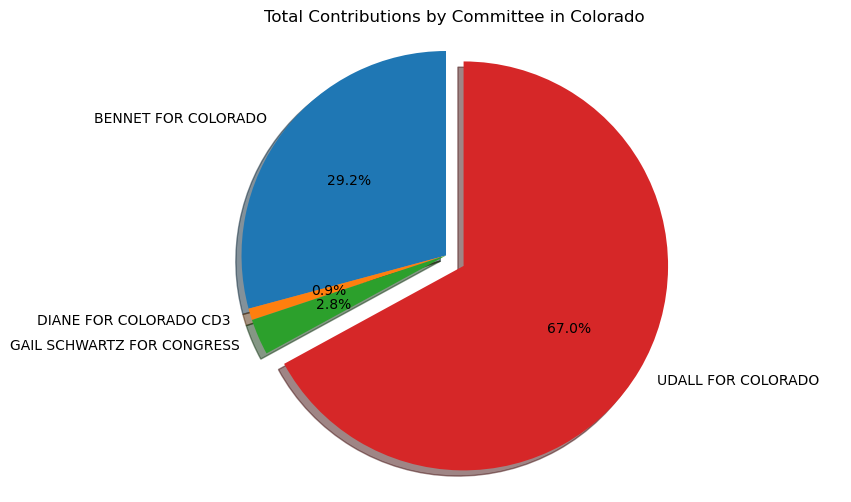

In [10]:
# Creating the pie chart for Colorado Donors
plt.figure(figsize=(10, 6))

# Focusing on Udall for Colorado
explode = (0, 0, 0, 0.1)

# Creating the acutal pie chart
plt.pie(colorado_pies['Total Contribution'], labels=colorado_pies['Committee_Name'], explode=explode, shadow=True, autopct='%1.1f%%', startangle=90)  

# Creating the title of the chart
plt.title('Total Contributions by Committee in Colorado')  

plt.axis('equal')
plt.show()

In [11]:
# DataFrame for Wisconsin (WI)
wisconsin_contributions_df = lobbyist_data_main[lobbyist_data_main['Committee_Election_State'] == 'WI'][[
    'Committee_Name', 'Committee_Id', 'Semi_Annual_Contribution', 'Quarterly_Contribution']]
wisconsin_contributions_df

,Committee_Name,Committee_Id,Semi_Annual_Contribution,Quarterly_Contribution
7,MANDELA BARNES FOR WISCONSIN,C00784959,216330.23,216330.23
28,MANDELA BARNES FOR WISCONSIN,C00784959,0.00,22451.66
32,MANDELA BARNES FOR WISCONSIN,C00784959,0.00,168928.44
43,TAMMY BALDWIN FOR SENATE,C00326801,0.00,0.00
50,TAMMY BALDWIN FOR SENATE,C00326801,0.00,0.00
74,TAMMY BALDWIN FOR SENATE,C00326801,0.00,0.00
118,TAMMY BALDWIN FOR SENATE,C00326801,0.00,0.00
123,TAMMY BALDWIN FOR SENATE,C00326801,0.00,0.00
129,TAMMY BALDWIN FOR SENATE,C00326801,0.00,0.00
136,TAMMY BALDWIN FOR SENATE,C00326801,32679.00,0.00


In [12]:
# Organizing the data for a Pie chart dataFrame
wisconsin_contributions_df.loc[:, 'Total Contribution'] = wisconsin_contributions_df['Semi_Annual_Contribution'] + wisconsin_contributions_df['Quarterly_Contribution']

wisconsin_pie = wisconsin_contributions_df.groupby('Committee_Id')
wisconsin_pie = wisconsin_contributions_df[['Committee_Name', 'Total Contribution']]


wisconsin_pies = wisconsin_contributions_df.groupby('Committee_Name')['Total Contribution'].sum().reset_index()
wisconsin_pies

,Committee_Name,Total Contribution
0,FEINGOLD SENATE COMMITTEE,821824.00
1,MANDELA BARNES FOR WISCONSIN,624040.56
2,RUSS FOR WISCONSIN,1844899.00
3,TAMMY BALDWIN FOR SENATE,1170659.00


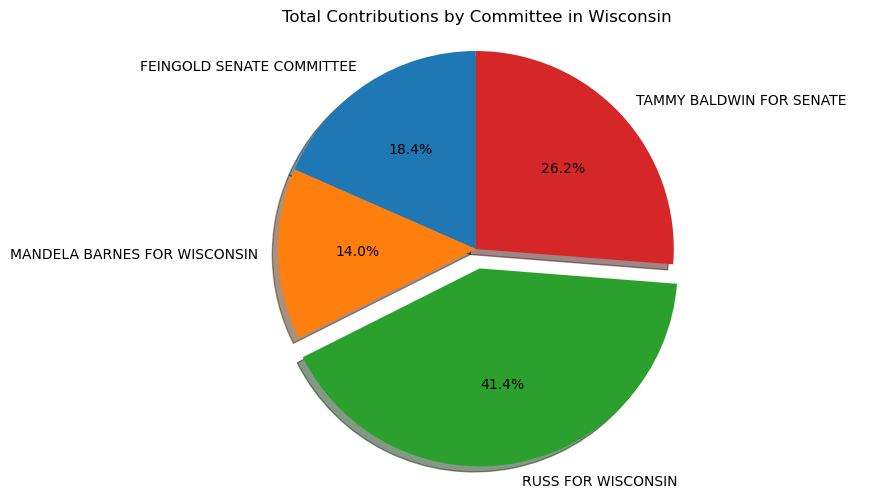

In [13]:
# Creating the pie chart for Wisconsin Donors
plt.figure(figsize=(10, 6))

# Focusing on Russ for Wisconsin
explode = (0, 0, 0.1, 0)

# Creating the acutal pie chart
plt.pie(wisconsin_pies['Total Contribution'], labels=wisconsin_pies['Committee_Name'], explode=explode, shadow=True, autopct='%1.1f%%', startangle=90)  

# Creating the title of the chart
plt.title('Total Contributions by Committee in Wisconsin')  

plt.axis('equal')
plt.show()